In [1]:
import sys
sys.path.append('../../')

import pickle
import matplotlib.pyplot as plt

In [2]:
from plants_and_TCR.analyze_data import grab_cmip_dataset
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.process_data import area_weighting
from plants_and_TCR.generate_figures import quick_map

In [3]:
DIR_CMIP_DICTS = directory_information.DIR_DATA_DICTIONARIES
CDICT = pickle.load(open(DIR_CMIP_DICTS+'cmip_dict.pickle', "rb"))

In [4]:
print('1')

1


# Load Data

In [101]:
# from dictionary
VARNAME = 'pr'
MODELNAME = 'CESM2'
ds_full=grab_cmip_dataset.grab_cmip_dataset(CDICT, MODELNAME,'1pctCO2',VARNAME)
ds_rad=grab_cmip_dataset.grab_cmip_dataset(CDICT, MODELNAME,'1pctCO2-rad',VARNAME)
ds_bgc=grab_cmip_dataset.grab_cmip_dataset(CDICT, MODELNAME,'1pctCO2-bgc',VARNAME)
ds_pi=grab_cmip_dataset.grab_cmip_dataset(CDICT, MODELNAME,'piControl',VARNAME)

# Process Data

In [102]:
end_yr=140#140
start_yr=110#110

In [103]:
ds1_end = ds_rad.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds2_end = ds_pi.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds_rad_effect = ds1_end-ds2_end

In [104]:
ds1_end = ds_full.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds2_end = ds_pi.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds_full_effect = ds1_end-ds2_end

In [105]:
ds1_end = ds_bgc.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds2_end = ds_pi.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds_phys_effect = ds1_end-ds2_end

In [106]:
ds1_end = ds_full.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds2_end = ds_rad.isel(time=slice(start_yr*12, end_yr*12)).mean(dim='time').load()
ds_phys2_effect = ds1_end-ds2_end

In [107]:
pi_end = ds_pi.isel(time=slice(start_yr*12, 140*12)).mean(dim='time').load()
pi_start = ds_pi.isel(time=slice(0*12, (end_yr-start_yr)*12)).mean(dim='time').load()
pi_drift = pi_end-pi_start

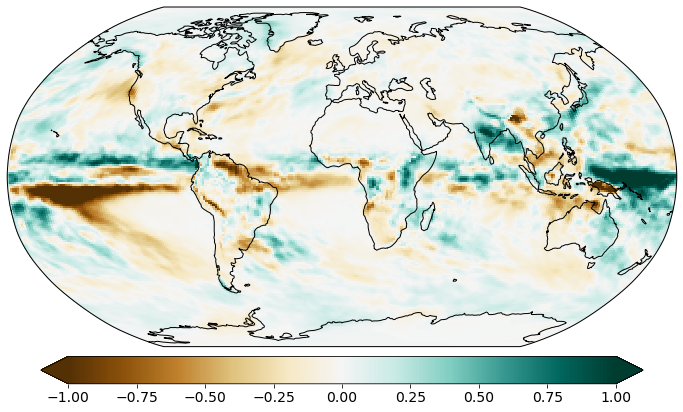

done saving file


(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa73d41d5c0>)

In [111]:
mapdata=ds_phys2_effect[VARNAME]*86400 #mm/s to mm/day
quick_map.quick_map(mapdata, mapdata['lat'],mapdata['lon'], cmap=plt.cm.BrBG, clim=[-1,1],
                   filepath=VARNAME+'_FULL-RAD.png')

#old

In [87]:
ds_diff = ds_full[VARNAME].load() - ds_rad[VARNAME].load()
ds_diff = ds_diff.isel(time=slice(60*12, 80*12)).mean(dim='time').load()

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [104]:
pnum = 1
print(ds_diff['plev'].isel(plev=slice(pnum,pnum+1)).values*0.01)
ds_diff_1level = ds_diff.isel(plev=slice(pnum,pnum+1)).mean(dim='plev')
mapdata=ds_diff_1level

[925.]


# Map Data

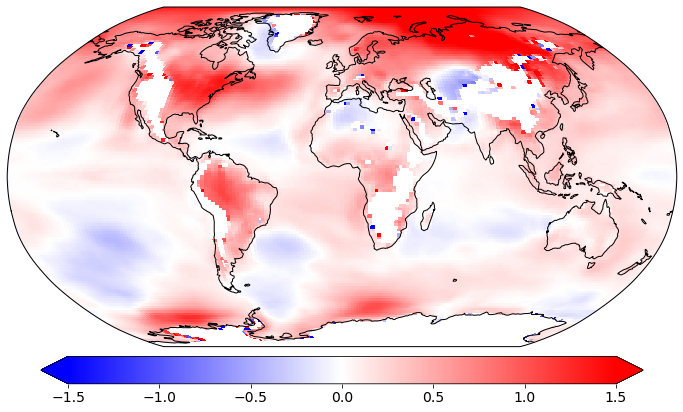

(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f3aa5317ef0>)

In [105]:
quick_map.quick_map(mapdata, mapdata['lat'],mapdata['lon'], cmap=plt.cm.bwr, clim=[-1.5,1.5])

# Averages

In [103]:
modelname = 'NorESM2-LM'
ds_FULL = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'1pctCO2','tas')
ds_RAD = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'1pctCO2-rad','tas')
ds_PI = grab_cmip_dataset.grab_cmip_dataset(CDICT, modelname,'piControl','tas')

In [104]:
average_type='global'
ds_FULL_global = area_weighting.get_global_mean_timeseries(ds_FULL, modelname, average_type)
ds_PI_global = area_weighting.get_global_mean_timeseries(ds_PI, modelname, average_type)

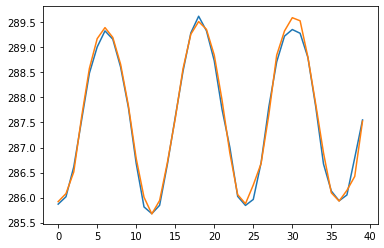

In [106]:
import numpy as np
plt.plot(np.arange(0,40),ds_PI_global[0:40])
plt.plot(np.arange(0,40),ds_FULL_global[0:40])